In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/lukas/Code/active_sciencing/venv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
import numpy as np
from skopt import gp_minimize

def f(x):
    return -x[0]**4/600.

NRANDOM = 2
NTOTAL = 10
res = gp_minimize(f, [(-5.0, 5.0)], n_random_starts=NRANDOM, n_calls=NTOTAL)

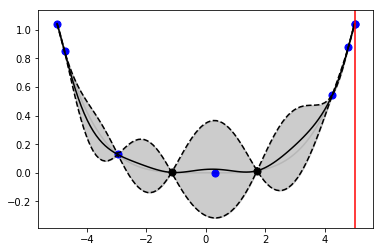

In [10]:
x = np.linspace(-5,5,100).reshape(-1,1)
prd,std = res.models[-1].predict(x, return_std = True)
prd = -prd
std = -std
y = f(x.reshape(1,-1))
plt.plot(x.ravel(),-y.ravel(), c = 'k', alpha = 0.1)
plt.plot(x[:,0],prd,linestyle = 'solid', c = 'k')
plt.plot(x[:,0],prd+std,linestyle = 'dashed', c= 'k')
plt.plot(x[:,0],prd-std,linestyle = 'dashed', c= 'k')
plt.fill_between(x[:,0].ravel(),prd+std,prd-std, alpha = 0.2, color = 'k')
plt.scatter(res.x_iters[:NRANDOM],-res.func_vals[:NRANDOM], marker = '.', s = 200, color = 'k')
plt.scatter(res.x_iters[NRANDOM:],-res.func_vals[NRANDOM:], marker = '.', s = 200, color = 'b')
plt.axvline(res.x[0],color = 'r')

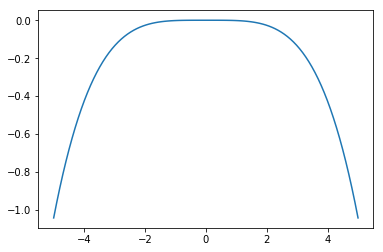

In [6]:
plt.plot(x.ravel(),f(x.reshape(1,-1)))

In [ ]:
import prior_dist

In [ ]:
data = np.random.normal(0,1,size = 1000)
p = prior_dist.Distribution('dummy',[-5,5],data)
p.pdf(x)
scipy.optimize.minimize_scalar(lambda x:-p.pdf(x[0]),0,bounds = [[-5,5]])

In [ ]:
def f(x):
    print x[0]
    return x[0]
#     return -p.pdf(x[0])

In [ ]:
f(x)